# **Imports and Load Dependences**


In [1]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to remove special characters
from unidecode import unidecode

my_palette = sns.diverging_palette(230, 20, as_cmap=False)
sns.set_theme(style="ticks", palette=my_palette)

# **Load Datasets**

In [3]:
#@title Download Datasets from GDrive

# ESC RENDA
!gdown 1fyJ8bHzEZMnfBTimBxUTNjs5Jb436QiO

# Cities Frame
!gdown 1hkzJTRxUQKvyqrw30rIpmrA1ZoiVd1oJ

Downloading...
From: https://drive.google.com/uc?id=1fyJ8bHzEZMnfBTimBxUTNjs5Jb436QiO
To: /content/RAIS_IBGE_RENDA.csv
100% 1.64M/1.64M [00:00<00:00, 30.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hkzJTRxUQKvyqrw30rIpmrA1ZoiVd1oJ
To: /content/results_scrapper_PCDII.csv
100% 698k/698k [00:00<00:00, 54.3MB/s]


In [4]:
df = pd.read_csv('RAIS_IBGE_RENDA.csv', encoding='ISO-8859-1', sep=';')

cities_df = pd.read_csv('results_scrapper_PCDII.csv', index_col=0)

# **Pre-Processing**

## **RENDA**

In [6]:
#@title Show attributes types and evaluate the existence of NaN values in each feature
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NO_MUNICIPIO                5570 non-null   object 
 1   Extrativa Mineral           5570 non-null   float64
 2   Prod. Mineral Não Metálico  5570 non-null   float64
 3   Indústria Metalúrgica       5570 non-null   float64
 4   Indústria Mecânica          5570 non-null   float64
 5   Elétrico e Comunic          5570 non-null   float64
 6   Material de Transporte      5570 non-null   float64
 7   Madeira e Mobiliário        5570 non-null   float64
 8   Papel e Gráf                5570 non-null   float64
 9   Borracha. Fumo. Couros      5570 non-null   float64
 10  Indústria Química           5570 non-null   float64
 11  Indústria Têxtil            5570 non-null   float64
 12  Indústria Calçados          5570 non-null   float64
 13  Alimentos e Bebidas         5570 

In [7]:
#@title Describe dataset with summary measures
#@markdown The idea is to evaluate the existence of different scales beetwen the features
#@markdown - Presence of outliers or industrial specialization?
df.describe()

,Extrativa Mineral,Prod. Mineral Não Metálico,Indústria Metalúrgica,Indústria Mecânica,Elétrico e Comunic,Material de Transporte,Madeira e Mobiliário,Papel e Gráf,Borracha. Fumo. Couros,Indústria Química,...,Instituição Financeira,Adm Técnica Profissional,Transporte e Comunicações,Aloj Comunic,Médicos Odontológicos Vet,Ensino,Administração Pública,Agricultura,Outros. ignorados,Total
count,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,...,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03
mean,4.876098e+03,2.198172e+03,2.995202e+03,4.494362e+03,1.185695e+03,1.031073e+03,1.558945e+03,2.105145e+03,1.616080e+03,2.266732e+03,...,1.862408e+04,3.724353e+03,5.183047e+03,5.066708e+03,3.663428e+03,3.125926e+03,3.988332e+03,4.236585e+03,1.046613e+04,3.075115e+03
std,1.324970e+05,4.116785e+04,6.902714e+04,1.528453e+05,2.964154e+04,2.389436e+04,3.184308e+04,4.743371e+04,4.181082e+04,4.836874e+04,...,3.616998e+05,5.157208e+04,8.020668e+04,6.825873e+04,5.853966e+04,4.924064e+04,5.218790e+04,5.806879e+04,4.023340e+05,3.397596e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.185183e+03
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.236456e+03,1.266042e+03,1.943035e+03,1.254997e+03,9.021175e+02,0.000000e+00,2.428586e+03,1.295923e+03,0.000000e+00,2.178938e+03
50%,0.000000e+00,1.234355e+03,1.107517e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.151400e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,9.555876e+03,1.635749e+03,2.376843e+03,1.489494e+03,1.460158e+03,1.239107e+03,2.877390e+03,1.665530e+03,0.000000e+00,2.492827e+03
75%,2.049328e+03,1.777078e+03,1.833848e+03,1.813480e+03,0.000000e+00,0.000000e+00,1.735244e+03,1.349493e+03,1.332254e+03,1.802701e+03,...,1.631462e+04,2.084053e+03,3.125930e+03,1.777774e+03,2.098142e+03,1.814378e+03,3.425168e+03,2.138780e+03,8.955993e+02,2.874330e+03
max,6.500125e+06,1.982125e+06,4.130766e+06,1.065719e+07,1.693375e+06,1.266972e+06,2.019429e+06,1.833875e+06,2.028625e+06,2.660255e+06,...,2.297233e+07,1.849468e+06,3.693375e+06,1.845375e+06,2.277884e+06,1.679125e+06,3.203212e+06,1.769994e+06,2.719288e+07,2.537721e+06


In [8]:
#@title View dataset struct
df.head()

,NO_MUNICIPIO,Extrativa Mineral,Prod. Mineral Não Metálico,Indústria Metalúrgica,Indústria Mecânica,Elétrico e Comunic,Material de Transporte,Madeira e Mobiliário,Papel e Gráf,Borracha. Fumo. Couros,...,Instituição Financeira,Adm Técnica Profissional,Transporte e Comunicações,Aloj Comunic,Médicos Odontológicos Vet,Ensino,Administração Pública,Agricultura,Outros. ignorados,Total
0,RO-ALTA FLORESTA D OESTE,8303.596429,1460.834400,1139.901667,1156.502000,1.187310e+03,0.000000,1435.412623,0.000000,0.000000,...,11756.227571,2691.283758,1906.973068,1404.867901,1472.931618,1449.643750,2839.320826,1808.425323,1507.000,2680.309326
1,RO-ARIQUEMES,4025.958337,1637.429291,2174.320311,1638.107812,1.578153e+03,1983.119180,1805.707969,1759.904063,1696.396204,...,10175.128620,1933.572561,2239.654572,1447.278952,1955.147011,2023.770987,4343.577017,2167.645788,0.000,2725.849126
2,RO-CABIXI,0.000000,1210.654091,1539.130000,2000.000000,0.000000e+00,0.000000,1058.972059,0.000000,0.000000,...,8594.757143,1995.974444,1760.351739,1238.737500,616.595714,1829.220000,2785.756043,2371.936096,3920.000,2325.052838
3,RO-CACOAL,2379.247241,1615.921755,1486.301940,1455.250000,1.348625e+06,2165.491034,1600.382452,1674.835135,3297.341124,...,10437.607188,1853.386706,2089.586316,1515.685541,2192.753868,2626.713299,4142.563195,1590.851946,781.275,2449.671511
4,RO-CEREJEIRAS,0.000000,1664.870000,1292.188000,1214.023000,0.000000e+00,1405.800000,1864.167045,1752.980909,1402.720000,...,12750.547015,1895.252798,1831.296263,1470.756693,1452.672000,1304.309231,2924.560581,2615.207959,55935.640,2879.817039


In [12]:
#@title Rename dataset keys
#@markdown Remove special characters from the features names

df = df.rename(columns={key: unidecode(key).replace(' ', '_').replace('.', '') for key in df.keys()})

In [17]:
#@title Get state and city in dataframe
#@markdown Separate State and City from the Municipio attribute

def format_city(city: str):

  city_without_special_charac = unidecode(city)

  city_capitalize = city_without_special_charac.capitalize()

  return city_capitalize


state_and_city_frame = df['NO_MUNICIPIO'].apply(lambda x: x.split('-'))

state = []
city = []

for row in state_and_city_frame:
  state.append(row[0])
  city.append(format_city(row[1]))

# Replace Municipio feature
df['Municipio'] = city

# Create Estado feature
df['Estado'] = state

df = df.drop(columns=['NO_MUNICIPIO'])

# Reorder the columns
df = df[df.columns[-1:].tolist() + df.columns[:-1].tolist()]

## **Cities Frame**

In [19]:
# Get state in name feature
cities_df['Estado'] = cities_df['nome'].str.extract(r'\((.*?)\)')

# Get name of city in name feature
cities_df['Municipio'] = cities_df['nome'].str.extract(r'^(.*?)(?:\s\()')

# Standardizes the names of cities
cities_df['Municipio'] = cities_df['Municipio'].apply(lambda x : format_city(x))

# **Initial EDA**

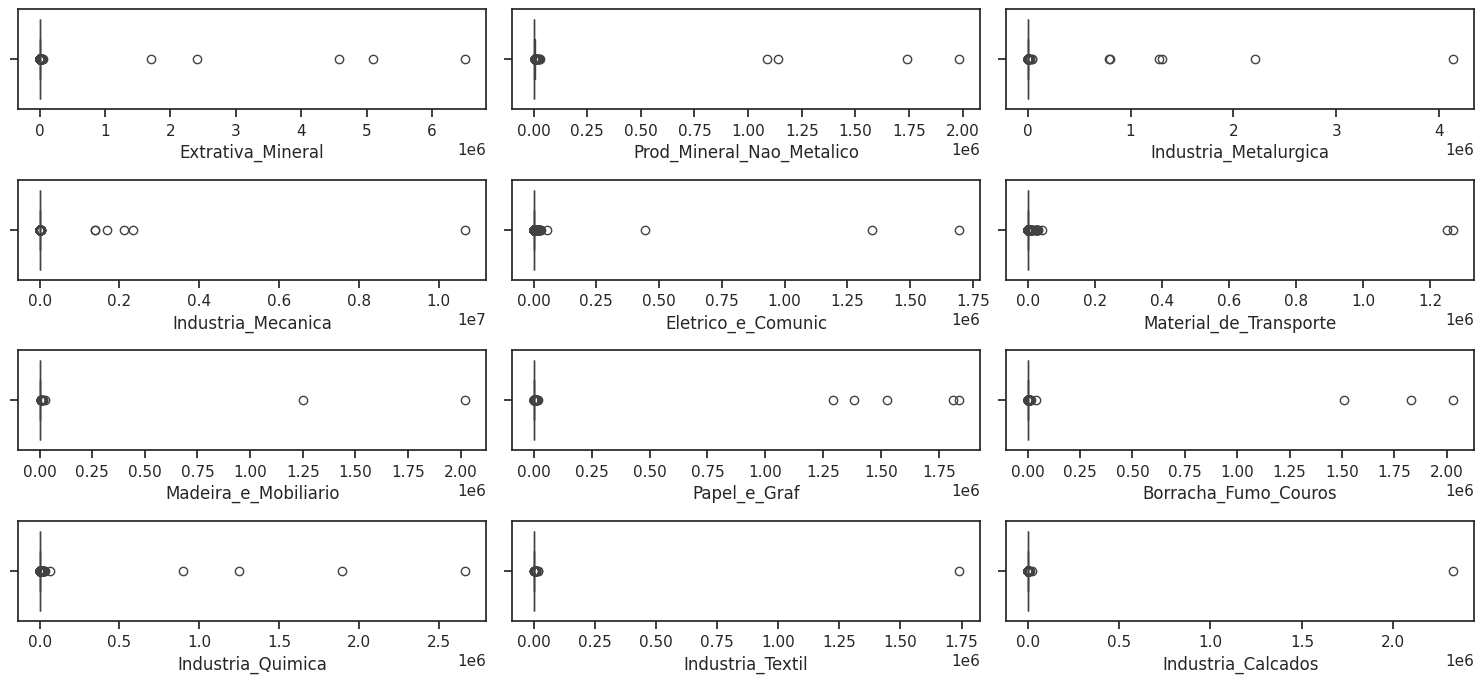

In [20]:
#@markdown Analyze outliers with a BoxPlot
numeric_features = list(df.keys())[2:]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.boxplot(df, x=key, ax=ax)

plt.tight_layout()
plt.show()

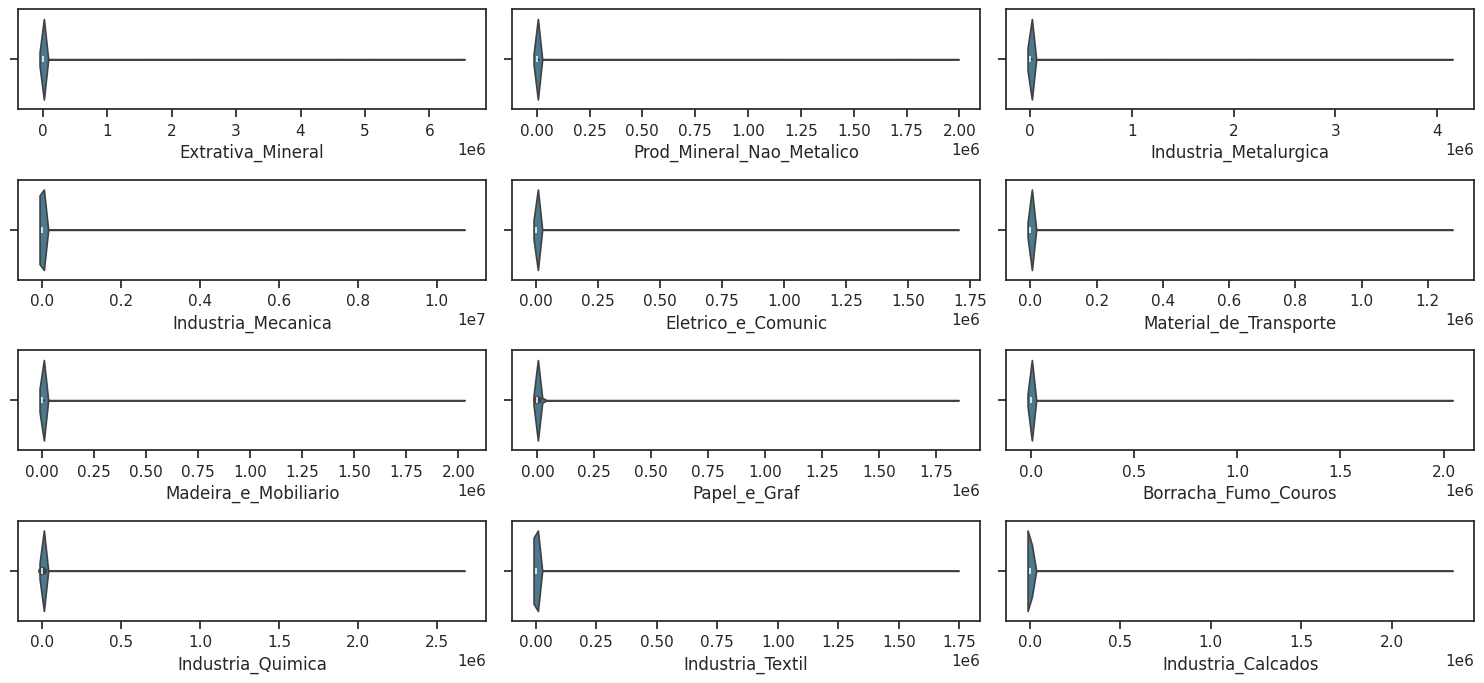

In [22]:
#@markdown Analize data distribution and outliers with a violin plot

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.violinplot(df, x=key, ax=ax)

plt.tight_layout()
plt.show()

In [23]:
#@title ## Create new dataframe to analyze correlation beetwen features and population size
new_df = pd.merge(df, cities_df, on=['Estado', 'Municipio'])
new_df = new_df.drop(columns=['codigo', 'nome', 'latitude','longitude', 'tag',
                              'PIB per capita do municipio', 'PIB Serviços',
                              'PIB Industria', 'PIB Adminstração Publica',
                              'PIB Agropecuária', 'Nivel Sociocultural',
                              'Nivel Capacidades Institucionais', 'Nivel Meio Ambiente'])

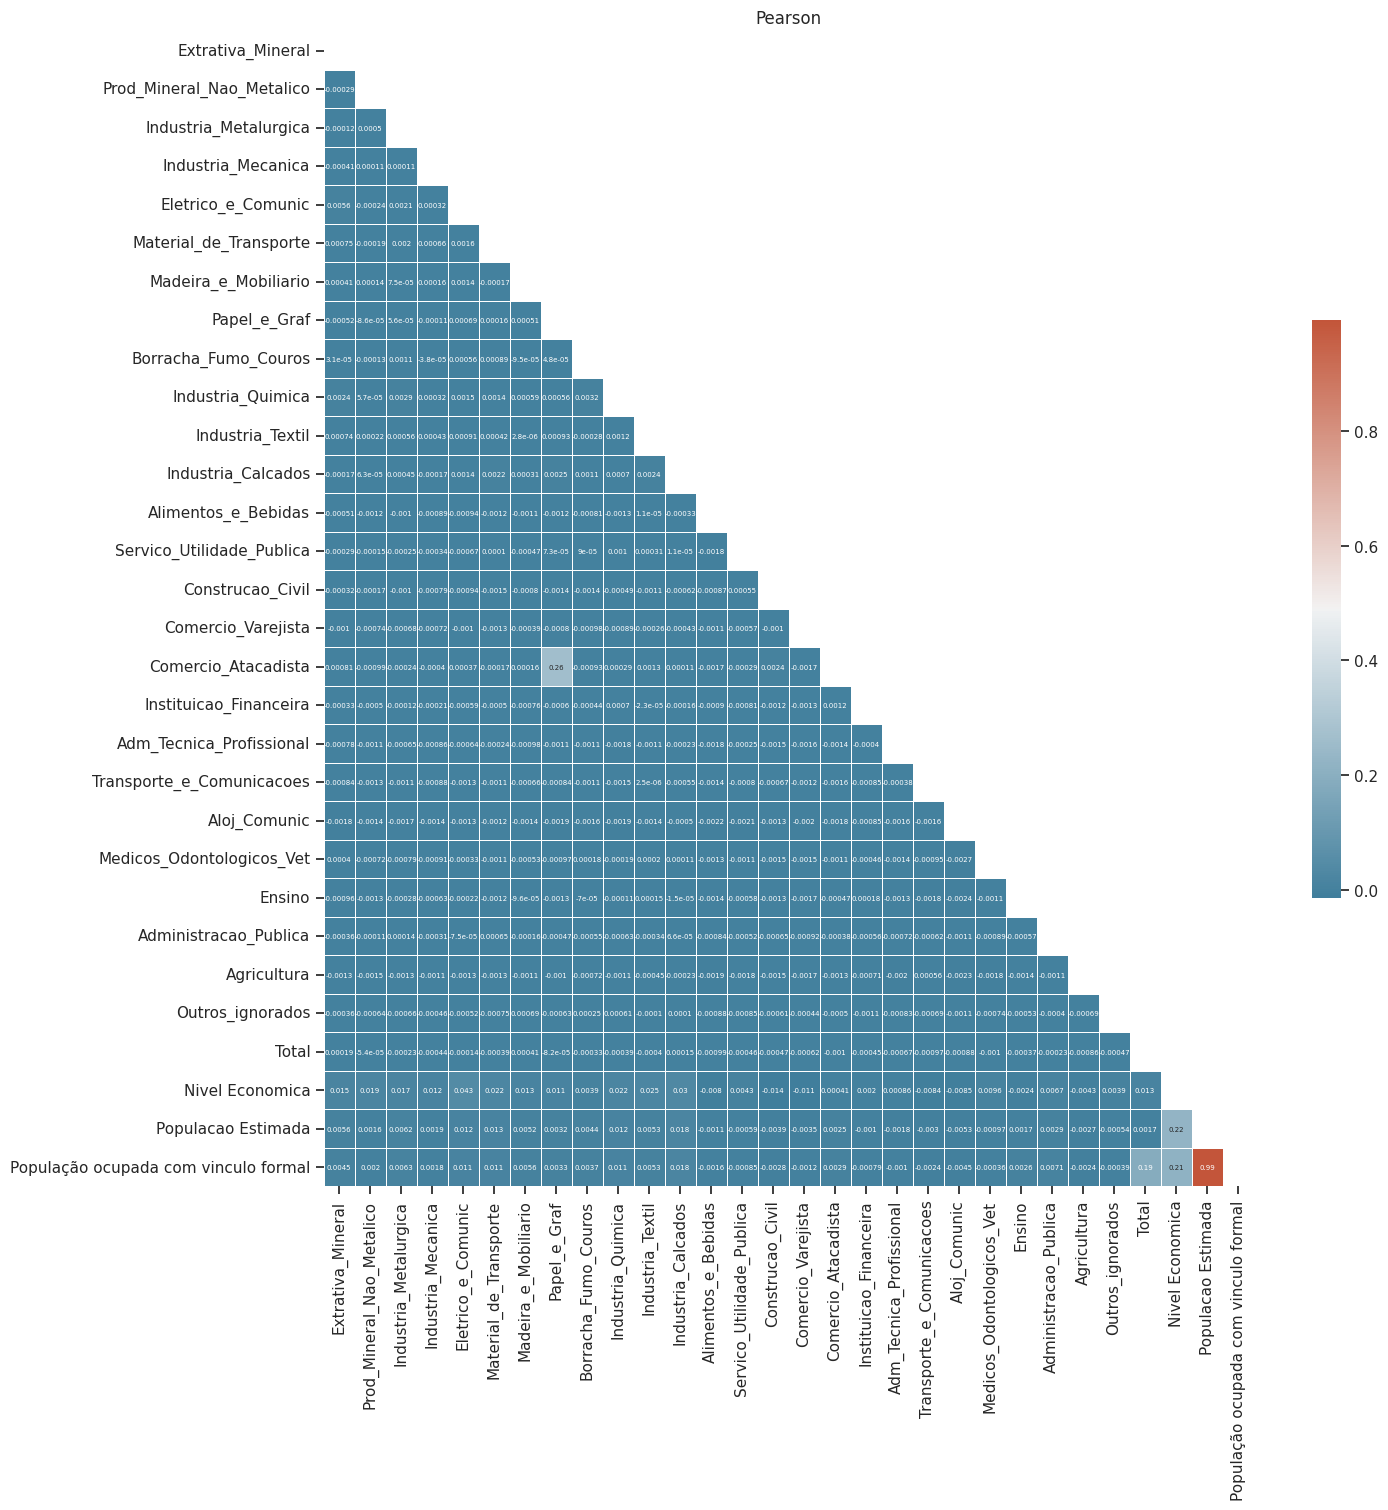

In [26]:
#@markdown Pearson Correlation

plt.figure(figsize=(15, 15))

corr_method = 'pearson'

corr = new_df.iloc[:, 2:].corr(method=corr_method)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            cmap=cmap,
            annot=True,
            annot_kws={"size": 5})

plt.title(corr_method.capitalize())

plt.show()

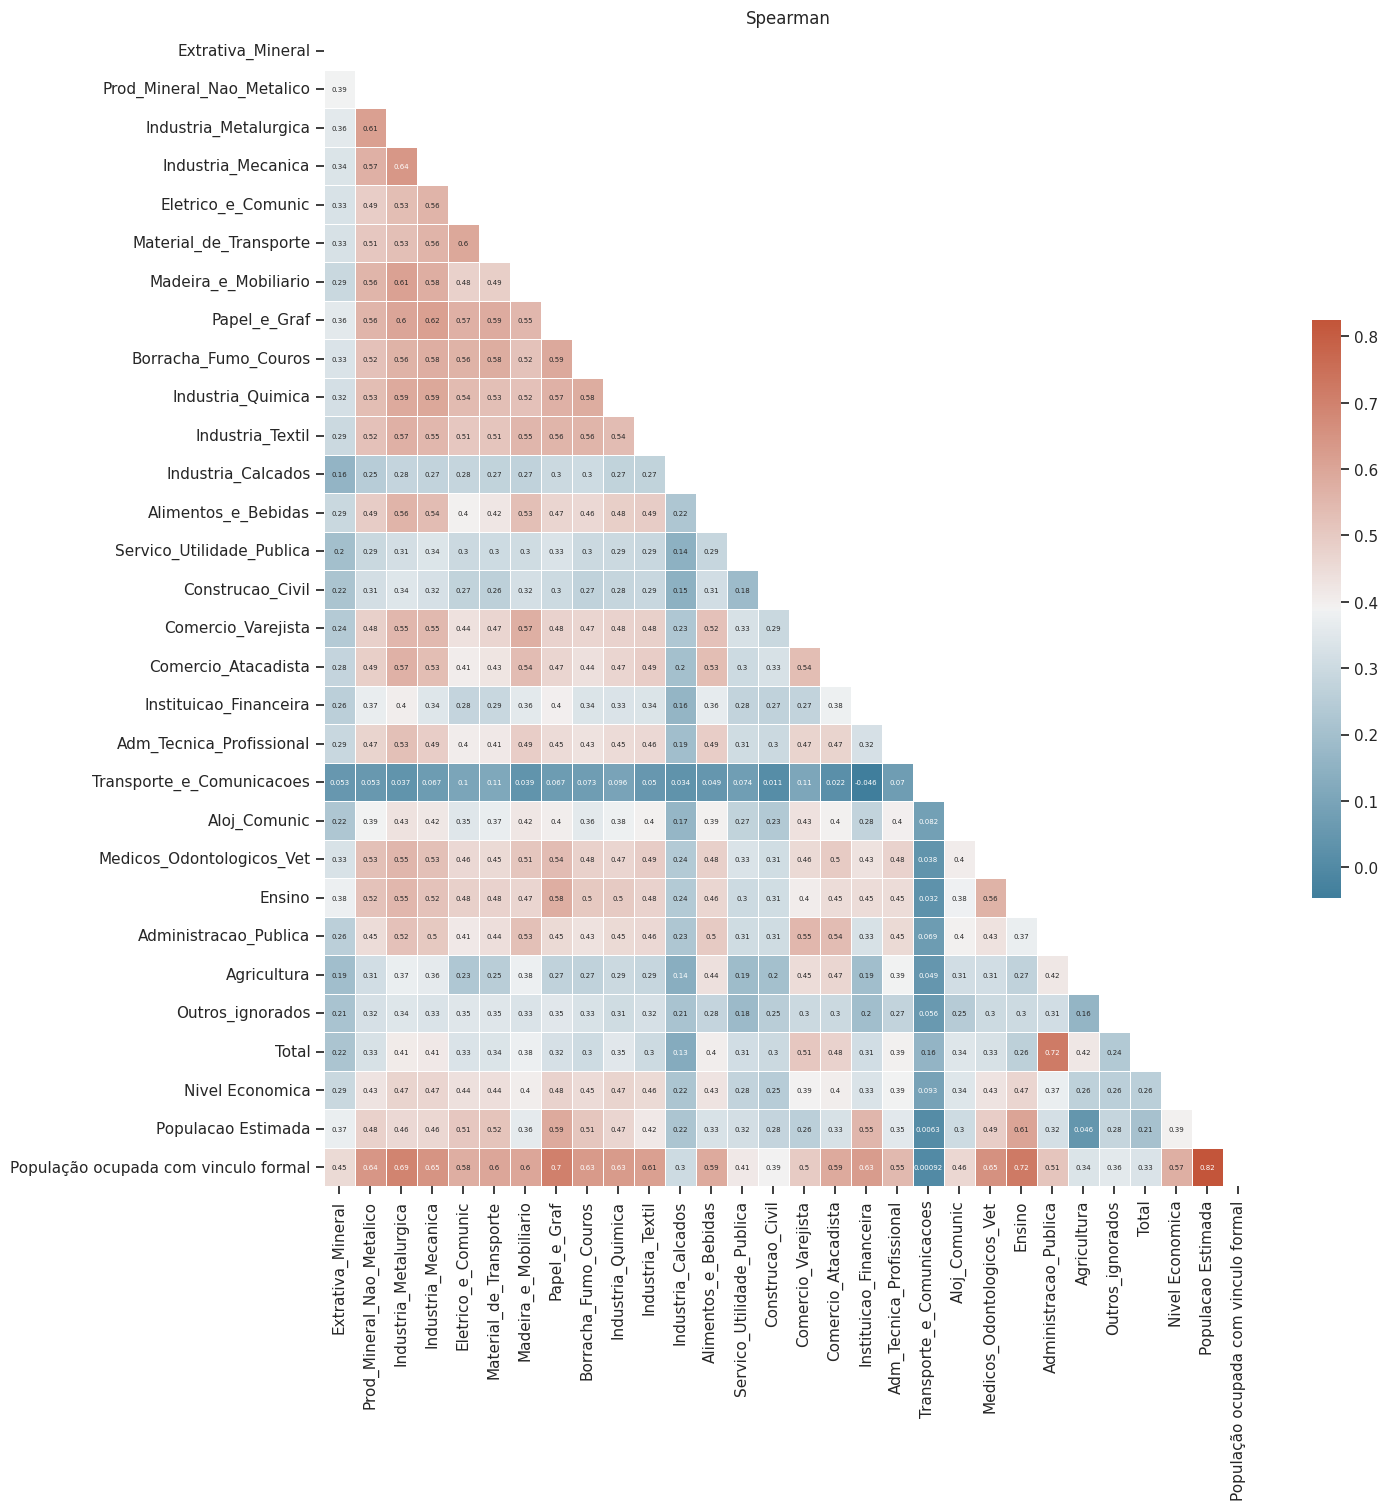

In [27]:
#@markdown Spearman Correlation

plt.figure(figsize=(15, 15))

corr_method = 'spearman'

corr = new_df.iloc[:, 2:].corr(method=corr_method)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            cmap=cmap,
            annot=True,
            annot_kws={"size": 5})

plt.title(corr_method.capitalize())

plt.show()

In [28]:
#@title ## Create new dataset without outliers
def remove_outliers_iqr(df: pd.DataFrame):
    # Compute Quantilies
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Compute IQR
    IQR = Q3 - Q1

    # Define upper and lower limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply filter in dataset
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df_filtered

df_without_outliers = remove_outliers_iqr(df.iloc[:,2:])

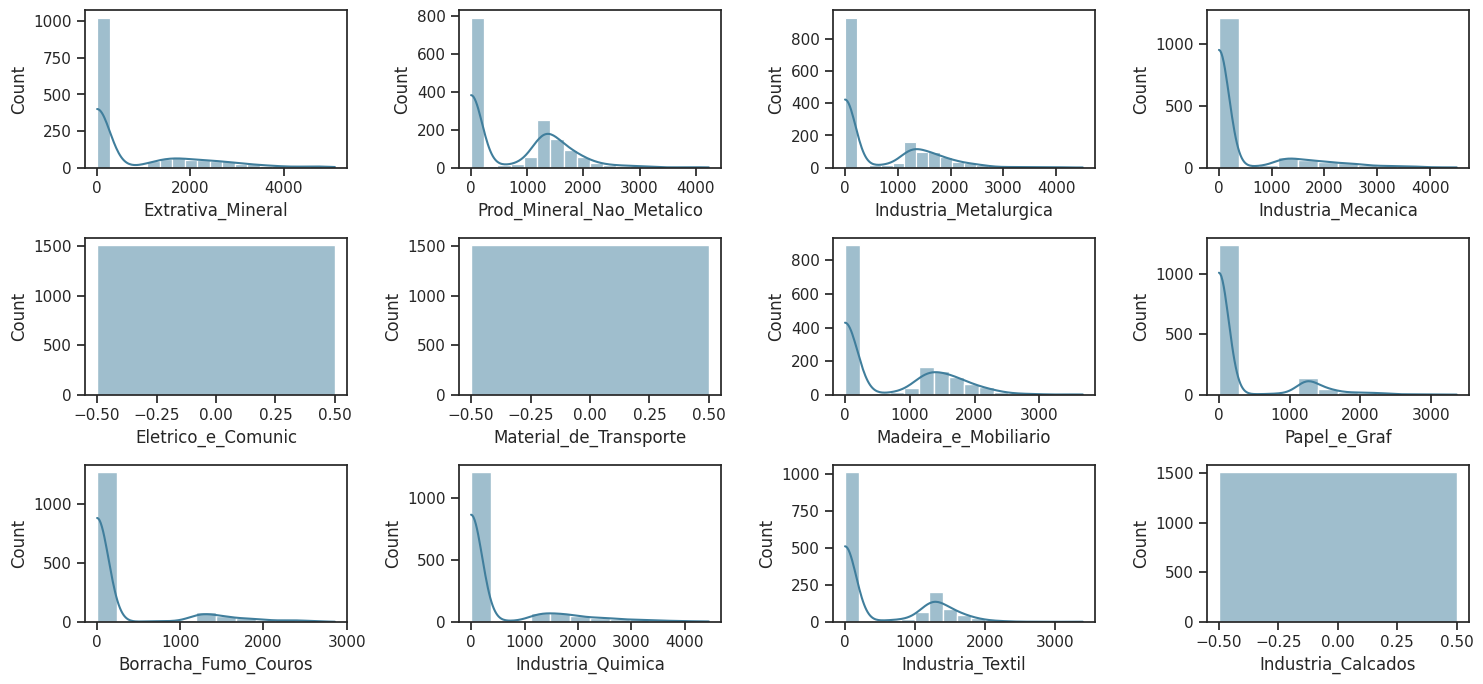

In [30]:
#@markdown Analyze the data distribution with a histogram plot

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 7))
axs = axs.flatten()

for key, ax in zip(numeric_features, axs):
  sns.histplot(df_without_outliers, x=key, ax=ax, kde=True)

plt.tight_layout()
plt.show()